In [64]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [65]:
peep_df = pd.read_csv('SexualMisconduct.csv', sep='#')
# Sample 3 of the records
peep_df.sample(3)

,Score,Content,ID,Thread Name,Status,Date
8,1,"Well, the police statement is out already. No ...",bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,04/22/2019 09:57:13
250,1,Okay let me just say that the victim can’t sue...,bgbm2u,[Unpopular opinion] about the recent saga of M...,Deleted,04/23/2019 03:42:56
90,1,[removed too quickly to be archived],bi6c3m,Sexual misconduct on campus: How can NUS make ...,Removed,04/28/2019 01:56:50


In [66]:
content_deleted = peep_df[peep_df['Status'] == 'Deleted']
content_removed = peep_df[peep_df['Status'] == 'Removed']



In [67]:
content_deleted_list = content_deleted['Content'].tolist()
content_removed_list = content_removed['Content'].tolist()



In [68]:
content_deleted_step1 = []
for d in content_deleted_list:
    if 'removed too quickly to be archived' in d:
        content_deleted_list.remove('[removed too quickly to be archived]')
    else:
        content_deleted_step1.append(d)
        
content_removed_step1 = []
for d in content_removed_list:
    if 'removed too quickly to be archived' in d:
        content_removed_list.remove('[removed too quickly to be archived]')
    else:
        content_removed_step1.append(d)
        
        


In [69]:
content_deleted_step2 = []
for d in content_deleted_step1:  
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%+/?)(>''°ʖ°😐]', '', d)
    d2 = re.sub(r'^https?:\/\/.*[\r\n]*', '', d2, flags=re.MULTILINE)
    d2 = re.sub(r'^https?:.*[\r\n]*', '', d2, flags=re.MULTILINE)
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    content_deleted_step2.append(d2)
    
content_removed_step2 = []
for d in content_removed_step1:  
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%+/?)(>''°ʖ°😐]', '', d)
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    content_removed_step2.append(d2)

In [70]:
content_deleted_token= ' '.join(content_deleted_step2)
content_deleted_token2 = content_deleted_token.split()

content_removed_token= ' '.join(content_removed_step2)
content_removed_token2 = content_removed_token.split()

In [71]:
stopwords = nltk.corpus.stopwords.words('english')
words = [ 'people', 'name', 'know', 'https']
stopwords.extend(words)

content_deleted_token3 = []
for l in content_deleted_token2:
    if l not in stopwords:
        content_deleted_token3.append(l)

content_removed_token3 = []
for l in content_removed_token2:
    if l not in stopwords:
        content_removed_token3.append(l)



In [72]:
content_deleted_final = ' '.join(content_deleted_token3)
content_removed_final = ' '.join(content_removed_token3)

print(content_deleted_final)


networkers lick right boots ever rehabilitate criminals approach victim mount private prosecution starting filing magistrate's complaint also file civil suit damages i'm sure damages really ask case oh unpopular opinion also like cctv around decide prosecute many reasons insufficient evidence would issue warning insufficient evidence well police statement already need speculate video reportedly found phone think sufficient right chemical engineering afaik downtrend hey cook prata isit flip story better favorite mamak flip prata work part time insurance agent school sure specifics knew singapore – police explained decision give 23yearold male undergraduate national university singapore nus conditional warning trespassing filming female student shower without consent civil war break minor issue perhaps time migrate guy decide liable doxxing laws though remember ah gong always watching whatever post imagine public sh*tstorm going happen someone really tried sue ms video capturing technolo

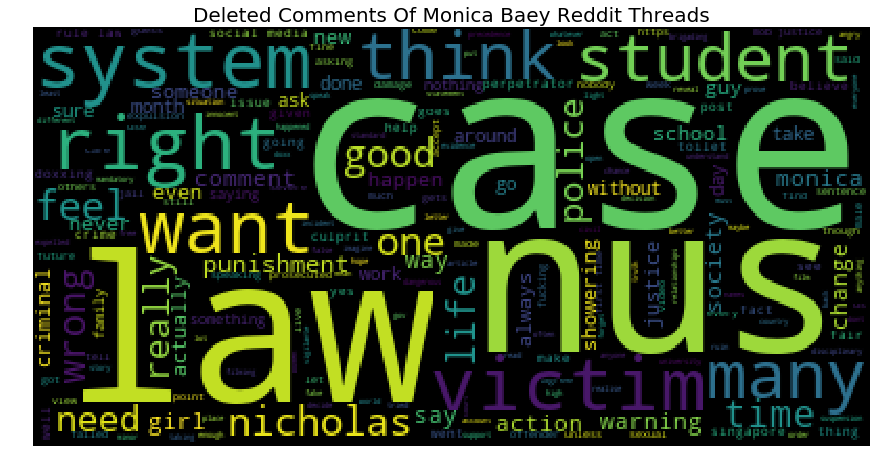

In [49]:
plt.figure(figsize=(15,8))

# create wordcloud here
desc_wordcloud = WordCloud().generate(content_deleted_final)

plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Deleted Comments Of Monica Baey Reddit Threads", fontsize=20)
plt.show()

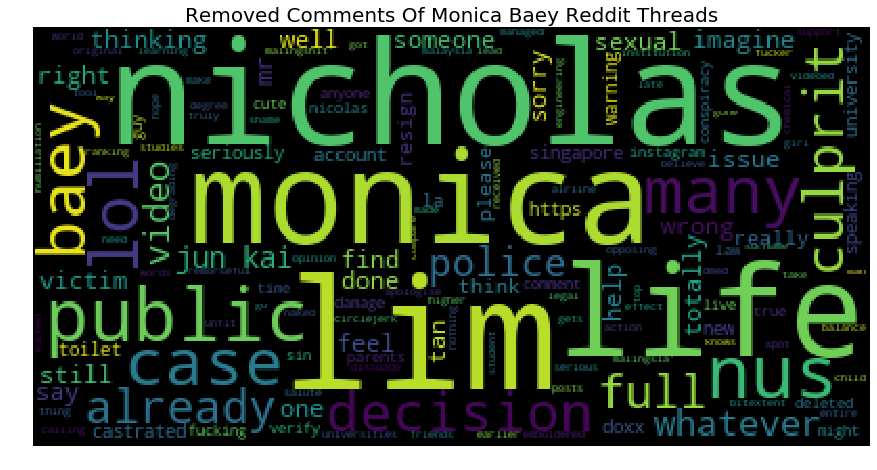

In [50]:
plt.figure(figsize=(15,8))

# create wordcloud here
desc_wordcloud = WordCloud().generate(content_removed_final)

plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Removed Comments Of Monica Baey Reddit Threads", fontsize=20)
plt.show()